# Volatility (Using Eikon Dataset)

Price vs Volatility


[Market Filter Dev Slide](https://docs.google.com/presentation/d/1OOsW0BRcUBuA6kPg_gjk7CH36ArFlg7-ZY-3GGm6Sh0/edit#slide=id.g543289dded_0_2)

Also see 2.0 Feature Engineering/Volatility.ipynb  

Volatility calcualtion follow this definition: https://www.investopedia.com/terms/v/volatility.asp



Start with Price table.  
Use lookup-symbol.csv to map column header to ticker symbol.  
Develop custom window function for volatility calculation.  
Computing volatility during analysis period.  
Extract cross-section data during target date.  
Report grouping of stock by volatility.  

In [1]:
import os, sys
import xlrd
import pandas as pd
import numpy as np
from datetime import datetime
import talib
from talib.abstract import *
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir("/home/jovyan/eikon-data")
# os.listdir() # Check data directory

lookup = pd.read_csv('lookup-stock.csv') # For lookup (ISIN, RIC, name, symbol)
# lookup


fname = 'SET_Price_2014-2020.xlsm'
wb = xlrd.open_workbook(fname)
wb.sheet_names()

['REQUEST_TABLE',
 'Price2020',
 'Price2019',
 'Price2018',
 'Price2017',
 'Price2016',
 'Price2015',
 'Price2014']

# Time Series for Each Stock

Process daily turnover data of each stock.

Stack worksheet together.

In [2]:
series = {}

for i in range(2,8): # Note the sheet index 2014-2019 1-7
    s = wb.sheets()[i]

    # Date index
    s1 = pd.Series(s.col(0)[4:]) # observation starts at row 4
    s1 = s1.apply(lambda x: datetime(*xlrd.xldate_as_tuple(x.value, wb.datemode)))
    
    for j in range(1, s.ncols):
        c = s.col(j)
        print("{}".format(c[3].value))
        name = c[3].value # Company name (Eikon name)
        # Convert to Ticker symbol
        try:
            name = lookup.loc[lookup['name']==name].symbol.values[0]
        except Exception as e:
            print("Lookup ticker for %s faile: %s" % (name, str(e)))
        # df = pd.DataFrame()
        if not "#ERROR" in name:
            # Convert spreadsheet market cap value to python
            s2 = pd.Series(c[4:]) # observation starts at row 4
            s2 = s2.apply(lambda x: x.value)
            df = pd.concat([s1, s2], axis=1)

            if not name in series:
                series[name] = []
            series[name].append(df)


SEVEN UTILITIES AND POWER ORS
AREEYA PROPERTY
ASIA AVIATION
AMATA B GRIMM PWPL.IFCF.
ADVANCED CONNECTION CORPORATION
ABSOLUTE CLEAN ENERGY
AUTOCORP HOLDING
ADVANCED INFO SER.
AEC SECURITIES
AE.THANA SINSAP (THAI.)
ASIA FIBER
AAPICO HITECH
AIKCHOL HOSPITAL
ASIAN INSULATORS
AIM COML.GW.FH.&. LH. REIT UNT.
AIM INDL.GW.FH.&. LH. REIT
ADVANCED INFO.TECH.
AJ PLAST
AJ ADVANCE TECHNOLOGY ORS
EKARAT ENGINEERING
ALLA
ALT TELECOM
ALUCON
AMANAH LEASING
AMARIN PRINTING & PBL.
AMATA
AMATA NVDR
AMATA VN
ASIA METAL
ANANDA DEVELOPMENT
AIRPORTS OF THAILAND
AP (THAILAND)
ASIAN PHYTOCEUTICALS
ASIA PRECISION
APEX DEVELOPMENT
AGRIPURE HOLDINGS
AQ ESTATE
AQUA
ASIASOFT
SYNERGETIC AUTO PERFORMANCE
ASEFA
ASIA HOTEL
ASIAN SEA CORPORATION
ASIAN MARINE SERVICES
ASIA SERMKIJ LEASING
ASIA PLUS GROUP HDG.
ASSET WORLD
ALLIANZ AYUDHYA CAPITAL
BUALUANG OFFE.LH. REIT.
BEGISTICS ORS
B-52 CAPITAL
BANGKOK AIRWAY
BGK.AVIATION FUEL SVS.
BANGKOK COMMERCIAL ASSET MANAGEMENT
BANPU
HITACHI CHEMICALSTORAGE BATTERY
BANK OF AYUDHYA


TPI POLENE POWER
THAI POLYCONS
THAI PACK.AND PRINT.
THAI.PRI.PR.FHLH. REIT
TQM CORPORATION
THAI RAYON
TRC CONSTRUCTION
TRITON HOLDING
THAI RUNG UNION CAR
THAI RUBBER LATEX GROUP
TRUE CORPORATION
THAI STEEL CABLE
THAI SOLAR ENERGY
THAI SETAKIJ IN.
THIENSURAT
THAI SUGAR TERMINAL
TATA STEEL (THAILAND)
THORESEN THAI AG.
TTCL
THAI TEXTILE
TALAAD THAI LEASEHOLD PROPERTY
TORAY TEXTILES
THAI TAP WATER SUPPLY
T U DOME RESD.CMX. LH. PR.
THAI UNION GROUP
THAIVIVAT INSURANCE
THAI VEGETABLE OIL
THAI WIRE PRODUCTS
THAI WAH
TWZ
TYCOONS WORLDWIDE GROUP
U CITY
UAC GLOBAL PUBLIC COMPANY LIMITED
UNION MOSAIC
UNIQUE ENGR.AND CON.
UOB KAY HIAN SECURITIES
UNION PLASTIC
UNION PIONEER FABRIC
UNITED PALM OIL IND.
URBANA PROPERTY (LEASE HOLD)
UNION TEXTILE INDUSTRIES
UNITED PAPER
UNIVENTURES
UNIVANICH PALM OIL
VAROPAKORN
VGI
VIBHAVADI MEDICAL
SRIVICHAI VEJVIVAT
VANACHAI GROUP
VINYTHAI
VICHITBHAN PALMOIL
VERANDA RESORT
WOW FACTOR
THAI WACOAL
WAVE ENTERTAINMENT
WHITE GROUP
WHA
WHA BUS.CMX.FH.&. LH. REIT
WHA PRUM.

SAHA PATH.INTER-HOLDING
STAR PTL.REFN.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SAHAKOL EQUIPMENT
SRIRACHA CONSTRUCTION
SRI PANWA HOSPLTY. REIT. TST.
SERMSUK
SURAPON FOODS
SERMSANG POWER CORPORATION
SALA @ SATHORN PROPERTY
SIAM STEEL SERVICE CTR.
SUB SRI THAI
SUB SRI THAI REAL ESTATE INVESTMENT TRUST
SRI TRANG AGRO-INDUSTRY
THAI STANLEY ELECTRIC
STARK CORPORATION
SINO-THAI ENGR.CON.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
STP & I
SAHA-UNION
SUPER ENERGY CORPORATION
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SUSCO
GOLDEN LIME
SAMITIVEJ
SVI
SVOA
SYMPHONY COMMUNICATION
SYNNEX (THAILAND)
SYNTEC CONSTRUCTION
THAI AGRO ENERGY
TIPCO ASPHALT
TBSP
TROPICAL CANNING
THANACHART CAPITAL
THAI CAPITAL
THAI CENTRAL CHM.
TCJ ASIA
TCM CORPORATION ORS
THAI COATING INDL.
TEAM PRECISION
TEAM CNSL.ENGR.&. MAN.
THAILAND FUTURE
THAIFOODS GROUP
THAI FILM INDUSTRIES
THAI PRESI

MCOT
MCS STEEL
MDX
MEGA LIFESCIENCES
MURAMOTO ELECTRON
MFC ASSET MANAGEMENT
MFEC
MIDA ASSETS
MILLCON STEEL
MINOR INTERNATIONAL
MILLIONAIRE PROPERTY
MFC INDL.REIT.TST. UTS.
MAJOR DEVELOPMENT
MJR.CPX.LFY.LH.PR.
MK REAL ESTATE DEV.
MIDA LEASING
NICHADA THANI PROPERTY 2
MFC-NICHADA THANI PROPERTY
MULTI-NATIONAL RESIDENCE
MODERNFORM GROUP
MONO TECHNOLOGY
M PICTURES ENTERTAINMENT
METRO SYSTEMS
MUANGTHAI CAPITAL ORS
MUANG THAI INSURANCE
NEW CITY (BANGKOK)
NC HOUSING
NEP REALTY & IND.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
WATTANA KARNPAET
NEX POINT
NFC
NAVAKIJ INSURANCE
NAVANAKORN
NOBLE DEVELOPMENT
NOK AIRLINES
NAM SENG INSURANCE
NONTHAVEJ HOSPITAL
NUSASIRI
NIRVANA DAII ORS
NAWARAT PATANAKARN
NAMYONG TERMINAL
OCC
OCEAN GLASS
OHTL
OISHI GROUP
ORIGIN PROPERTY
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
PAN ASIA FOOTWEAR
PACIFIC PIPE
PATO CHEMICAL IND.
PRESIDENT BAKERY
PCS MACHINE GPHD.
PADAENG INDUSTRY
PR

CENTRAL PATTANA
CPN COML.GW.LH.PR.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
C P TOWER GROWTH LEASEHOLD PROPERTY
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
CHU KAI
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
CROWN SEAL
CSP STEEL CENTER
CITY SPORTS & RECREATION
COMMUNICATION & SYSTEM SOLUTION
CENTARA H&R.LH.PR.
CHAROONG THAI WIRE CAB.
CHAI WATANA TANNERY
DYNASTY CERAMIC
DCON PRODUCTS
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
DELTA ELECTRONICS
DEMCO
DIGITAL TELECOM.IFCF.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
DIAMOND BLDG.PRODUCTS
TOTAL ACCESS COMMS.
DUSIT THANI
DTC INDUSTRIES
ENERGY ABSOLUTE
EAS

THAI VEGETABLE OIL
THAI WIRE PRODUCTS
THAI WAH
TWZ
TYCOONS WORLDWIDE GROUP
U CITY
UAC GLOBAL PUBLIC COMPANY LIMITED
UNION MOSAIC
UNIQUE ENGR.AND CON.
UOB KAY HIAN SECURITIES
UNION PLASTIC
UNION PIONEER FABRIC
UNITED PALM OIL IND.
URBANA PROPERTY (LEASE HOLD)
UNION TEXTILE INDUSTRIES
UNITED PAPER
UNIVENTURES
UNIVANICH PALM OIL
VAROPAKORN
VGI
VIBHAVADI MEDICAL
SRIVICHAI VEJVIVAT
VANACHAI GROUP
VINYTHAI
VICHITBHAN PALMOIL
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
WOW FACTOR
THAI WACOAL
WAVE ENTERTAINMENT
WHITE GROUP
WHA
WHA BUS.CMX.FH.&. LH. REIT
WHA PRUM.GW.FH.&. LH. REIT
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
WICE LOGISTICS
WIIK
WYNCOAST INDUSTRIAL PARK
WORKPOINT ENTERTAINMENT
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 i

MFC INDL.REIT.TST. UTS.
MAJOR DEVELOPMENT
MJR.CPX.LFY.LH.PR.
MK REAL ESTATE DEV.
MIDA LEASING
NICHADA THANI PROPERTY 2
MFC-NICHADA THANI PROPERTY
MULTI-NATIONAL RESIDENCE
MODERNFORM GROUP
MONO TECHNOLOGY
M PICTURES ENTERTAINMENT
METRO SYSTEMS
MUANGTHAI CAPITAL ORS
MUANG THAI INSURANCE
NEW CITY (BANGKOK)
NC HOUSING
NEP REALTY & IND.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
WATTANA KARNPAET
NEX POINT
NFC
NAVAKIJ INSURANCE
NAVANAKORN
NOBLE DEVELOPMENT
NOK AIRLINES
NAM SENG INSURANCE
NONTHAVEJ HOSPITAL
NUSASIRI
NIRVANA DAII ORS
NAWARAT PATANAKARN
NAMYONG TERMINAL
OCC
OCEAN GLASS
OHTL
OISHI GROUP
ORIGIN PROPERTY
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
PAN ASIA FOOTWEAR
PACIFIC PIPE
PATO CHEMICAL IND.
PRESIDENT BAKERY
PCS MACHINE GPHD.
PADAENG INDUSTRY
PRANDA JEWELRY
PERMSIN STEEL WORKS
PROPERTY PERFECT
PEOPLE'S GARMENT
PATKOL
PHATRA LEASING
PLAN B MEDIA
THE PLATINUM GROUP
POWER LINE ENGR.
PREMIER MA

ANANDA DEVELOPMENT
AIRPORTS OF THAILAND
AP (THAILAND)
ASIAN PHYTOCEUTICALS
ASIA PRECISION
APEX DEVELOPMENT
AGRIPURE HOLDINGS
AQ ESTATE
AQUA
ASIASOFT
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
ASIA HOTEL
ASIAN SEA CORPORATION
ASIAN MARINE SERVICES
ASIA SERMKIJ LEASING
ASIA PLUS GROUP HDG.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
ALLIANZ AYUDHYA CAPITAL
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
BEGISTICS ORS
B-52 CAPITAL
BANGKOK AIRWAY
BGK.AVIATION FUEL SVS.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
BANPU
HITACHI CHEMICALSTORAGE BATTERY
BANK OF AYUDHYA
BANGKOK BANK
BANGKOK CHAIN HOSPITAL
BANGCHAK CORPORATION ORS
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
BIRLA CARBON
BANGKOK DUSIT M

PTT GLOBAL CHEMICAL
PYLON
QUALITY CON.PRDS.
QUALITY HOUSES
QLT.HSE.HLRS.FH &. LH PROP
QUALITY HOSPITALITY LEASEHOLD PROPERTY
QUALITY HOUSES LEASEHOLD PROPERTY FU
RAMKHAMHAENG HOSPITAL
RATCH GROUP PCL
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
ROYAL CERAMIC IND.
REGIONAL CONTAINERS LIN.
RICHY PLACE 2002
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
RAIMON LAND
ROCKWORTH
ROYAL ORCHID HTL.(THAI.)
ROJANA INDUSTRIAL PARK
RPCG
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
RS
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
S & J INTL.ENTERPRISES
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SINGHA ESTATE
SABINA
SAMCHAI STEEL INDS.
SAMART
SAMMAKORN
SAMART TELCOMS
SAPPE
SOMBOON ADVANCE TECH.
THAITHEPAROS
SRISAWAD CORPORATION
SAWANG EXPORT
SAMUI BURI PROPERTY FUND
SC ASSET
SIAM COMMERCIAL BANK

In [3]:
print("Securities %s " % len(series))

Securities 600 


In [4]:
# All ticker symbols
# series.keys()

In [5]:

def get_price_series(ticker, series):
    stock1 = series[ticker]
    # This contains data separated by year.
    # stock1

    # Construct dataframe columns: 0=Date, 1=Price

    # Make one series of whole study period
    stock1 = pd.concat(stock1, axis=0)
    stock1.columns = ['Date', 'Price']
    date_time = pd.to_datetime(stock1.pop('Date'), format='%Y-%m-%d')
    stock1['Date'] = date_time
    stock1['t'] = date_time
    stock1 = stock1.set_index('t') 
    stock1 = stock1.sort_index() # Sort rows by date index
    return stock1

stock1 = get_price_series('PTT', series)

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


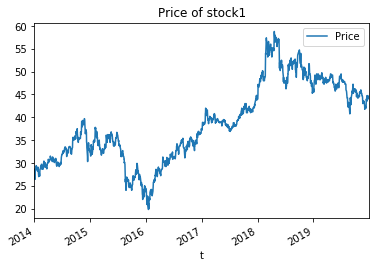

In [6]:
# Remove NA
# stock = stock.loc[stock['VA']!='NA']

# Check NA
stock1.loc[stock1['Price']=='NA']

stock1[['Price']].plot(title="Price of stock1")

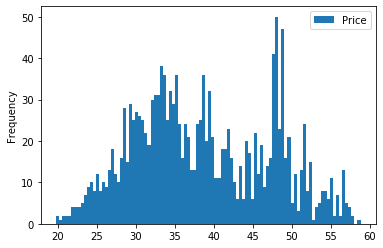

In [7]:
stock1[['Price']].plot.hist(bins=100)

# Calculating Volatility

For simplicity, let's assume we have monthly stock closing prices of $1 through $10. For example, month one is $1, month two is $2, and so on. To calculate variance, follow the five steps below.

1. Find the mean of the data set. This means adding each value, and then dividing it by the number of values. This is a mean, or average price, of 5.50.
2. Calculate the difference between each data value and the mean. This is often called deviation. For example, we take 10 - 5.50 = 4.50, then 9 - 5.50 = 3.50. This continues all the way down to the our first data value of 1. Negative numbers are allowed. Since we need each value, these calculation are frequently done in a spreadsheet.  
3. Square the deviations. This will eliminate negative values.  
4. Add the squared deviations together. In our example, this equals 82.5.  
5. Divide the sum of the squared deviations (82.5) by the number of data values.  

In [8]:
df = stock1
# df['5d_rolling_mean'] = stock1.rolling(5).mean()
# df['5d_mean_expanding'] = stock1.expanding(5).mean()

# Calculate daily return and Price St.Dev. for single series


Use window function

https://pandas.pydata.org/pandas-docs/stable/reference/window.html


See this example how to use apply with lambda function.

https://stackoverflow.com/questions/40954560/pandas-rolling-apply-custom



rolling.Rolling.std gives different value than our custom volatility calculation functions.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.std.html

Using ddof=0 (default degree of freedom is n-1) will get the same values for us and them.


In [9]:
df['Price']

t
2014-01-01    28.60
2014-01-02    27.40
2014-01-03    26.80
2014-01-06    26.40
2014-01-07    28.10
              ...  
2019-12-25    44.25
2019-12-26    44.50
2019-12-27    44.25
2019-12-30    44.00
2019-12-31    44.00
Name: Price, Length: 1566, dtype: float64

In [10]:
df['Daily Return'] = np.log(df['Price'] / df['Price'].shift(1))

In [11]:
df['price_avg30d'] = df['Price'].rolling(window=30).mean()
df['price_avg180d'] = df['Price'].rolling(window=180).mean()
df['price_avg300d'] = df['Price'].rolling(window=300).mean()

In [12]:
df['mean_5d'] = df['Daily Return'].rolling(window=5).mean()
df

,Price,Date,Daily Return,price_avg30d,price_avg180d,price_avg300d,mean_5d
t,,,,,,,
2014-01-01,28.60,2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,27.40,2014-01-02,-0.042864,NaN,NaN,NaN,NaN
2014-01-03,26.80,2014-01-03,-0.022141,NaN,NaN,NaN,NaN
2014-01-06,26.40,2014-01-06,-0.015038,NaN,NaN,NaN,NaN
2014-01-07,28.10,2014-01-07,0.062406,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-12-25,44.25,2019-12-25,0.000000,43.408333,45.787500,46.826667,-0.002247
2019-12-26,44.50,2019-12-26,0.005634,43.400000,45.763889,46.810000,0.001127
2019-12-27,44.25,2019-12-27,-0.005634,43.383333,45.740278,46.791667,-0.001127


In [13]:

df.dropna(inplace=True)
df

,Price,Date,Daily Return,price_avg30d,price_avg180d,price_avg300d,mean_5d
t,,,,,,,
2015-02-24,34.10,2015-02-24,0.008837,34.990000,34.405556,32.462000,-7.482887e-03
2015-02-25,33.80,2015-02-25,-0.008837,35.043333,34.429444,32.479333,-1.037697e-02
2015-02-26,34.50,2015-02-26,0.020499,35.130000,34.456111,32.503000,-2.498002e-17
2015-02-27,34.30,2015-02-27,-0.005814,35.200000,34.481111,32.528000,-1.162794e-03
2015-03-02,35.00,2015-03-02,0.020203,35.256667,34.508333,32.556667,6.977452e-03
...,...,...,...,...,...,...,...
2019-12-25,44.25,2019-12-25,0.000000,43.408333,45.787500,46.826667,-2.247215e-03
2019-12-26,44.50,2019-12-26,0.005634,43.400000,45.763889,46.810000,1.126764e-03
2019-12-27,44.25,2019-12-27,-0.005634,43.383333,45.740278,46.791667,-1.126764e-03


In [14]:
# Checking which variable we can access.
# stddev_5d = lambda x: x.mean() + x[0]
# x[5] -> IndexError: index 5 is out of bounds

# Calcualtes price volatility (std.dev.) for 5 day window. 1. Find mean. 2. Find deviation. 3. Squared deviation. 4. Sum squared devations. 5. Divide by number of ovservations. This is variance. 6. Take square root.
stddev_5d = lambda x: np.sqrt((np.square(x[0]-x.mean()) + np.square(x[1]-x.mean()) + np.square(x[2]-x.mean()) + np.square(x[3]-x.mean()) + np.square(x[4]-x.mean())) / 5)

def stddev_ndays(x, n=5):
    """Calcualte standard deviation which is the proxy for volatility.
       Improve for clarity over stddev_5d one-liner. """
    mean = x.mean() # Mean of the window.
    total_squared_deviation = 0.0 # For collecting squared deviation.
    for i in range(n):
        obs = x[i]
        deviation = obs - mean
        sqrd_dev = np.square(deviation)
        total_squared_deviation += sqrd_dev
    return np.sqrt(total_squared_deviation / n) # Take square root of variance and return st.dev. value

df['rolling5d_stddev'] = df['Price'].rolling(5).std() # Short cut available from pandas
df['stddev_5d'] = df['Price'].rolling(5).apply(stddev_5d)
df['stddev_ndays5'] = df['Price'].rolling(5).apply(stddev_ndays, (5,)) # Manual window function
df['stddev_ndays10'] = df['Price'].rolling(10).apply(stddev_ndays, (10,)) # Manual window function
df['stddev_ndays15'] = df['Price'].rolling(15).apply(stddev_ndays, (15,)) # Manual window function
df['stddev_ndays30'] = df['Price'].rolling(30).apply(stddev_ndays, (30,)) # Manual window function

df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


,Price,Date,Daily Return,price_avg30d,price_avg180d,price_avg300d,mean_5d,rolling5d_stddev,stddev_5d,stddev_ndays5,stddev_ndays10,stddev_ndays15,stddev_ndays30
t,,,,,,,,,,,,,
2015-02-24,34.10,2015-02-24,0.008837,34.990000,34.405556,32.462000,-7.482887e-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-25,33.80,2015-02-25,-0.008837,35.043333,34.429444,32.479333,-1.037697e-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-26,34.50,2015-02-26,0.020499,35.130000,34.456111,32.503000,-2.498002e-17,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-27,34.30,2015-02-27,-0.005814,35.200000,34.481111,32.528000,-1.162794e-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-02,35.00,2015-03-02,0.020203,35.256667,34.508333,32.556667,6.977452e-03,0.450555,0.402989,0.402989,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,44.25,2019-12-25,0.000000,43.408333,45.787500,46.826667,-2.247215e-03,0.223607,0.200000,0.200000,0.728440,1.289164,1.007507
2019-12-26,44.50,2019-12-26,0.005634,43.400000,45.763889,46.810000,1.126764e-03,0.209165,0.187083,0.187083,0.474342,1.361168,0.817007
2019-12-27,44.25,2019-12-27,-0.005634,43.383333,45.740278,46.791667,-1.126764e-03,0.223607,0.200000,0.200000,0.480234,1.299466,0.559265


# Cross-section analysis of SET: Nov, Dev 2019

In [15]:
volatility = {}

for k in series.keys():
    # print(k)
    try:
        stock = get_price_series(k, series)
        # Price average
        stock['price_avg30d'] = stock['Price'].rolling(window=30).mean()
        stock['price_avg180d'] = stock['Price'].rolling(window=180).mean()
        stock['price_avg300d'] = stock['Price'].rolling(window=300).mean()
        # Calculate volatility
        stock['stddev_ndays5'] = stock['Price'].rolling(5).apply(stddev_ndays, (5,))
        stock['stddev_ndays10'] = stock['Price'].rolling(10).apply(stddev_ndays, (10,))
        stock['stddev_ndays15'] = stock['Price'].rolling(15).apply(stddev_ndays, (15,))
        stock['stddev_ndays30'] = stock['Price'].rolling(30).apply(stddev_ndays, (30,))
        
        # Cut period with data
        volatility[k] = stock['2019-01-01':'2019-12-31']
    except Exception as e:
        print("Error calculating volatility for %s: %s" % (k, e))

Error calculating volatility for ACE: No numeric types to aggregate
Error calculating volatility for ACG: No numeric types to aggregate
Error calculating volatility for AIMCG: No numeric types to aggregate
Error calculating volatility for AIMIRT: No numeric types to aggregate
Error calculating volatility for AJA: No numeric types to aggregate
Error calculating volatility for ALLA: No numeric types to aggregate
Error calculating volatility for ALT: No numeric types to aggregate
Error calculating volatility for AMATAV: No numeric types to aggregate
Error calculating volatility for ASAP: No numeric types to aggregate
Error calculating volatility for ASEFA: No numeric types to aggregate
Error calculating volatility for AWC: No numeric types to aggregate
Error calculating volatility for BWORK: No numeric types to aggregate
Error calculating volatility for BA: No numeric types to aggregate
Error calculating volatility for BAM: No numeric types to aggregate
Error calculating volatility for BC

Error calculating volatility for TTT: No numeric types to aggregate
Error calculating volatility for TWPC: No numeric types to aggregate
Error calculating volatility for VPO: No numeric types to aggregate
Error calculating volatility for VRANDA: No numeric types to aggregate
Error calculating volatility for WHABT: No numeric types to aggregate
Error calculating volatility for WHART: No numeric types to aggregate
Error calculating volatility for WHAUP: No numeric types to aggregate
Error calculating volatility for WICE: No numeric types to aggregate
Error calculating volatility for WP: No numeric types to aggregate
Error calculating volatility for WPH: No numeric types to aggregate
Error calculating volatility for ZEN: No numeric types to aggregate


In [16]:
len(volatility) # Volatility data for year 2019

469

In [17]:
# Checkpoint. Save 2019 volatility calculation data to disk.
volatility



{'7UP':             Price       Date  price_avg30d  price_avg180d  price_avg300d  \
 t                                                                          
 2019-01-01   0.44 2019-01-01      0.480000       0.492778       0.535367   
 2019-01-02   0.43 2019-01-02      0.479667       0.492389       0.534467   
 2019-01-03   0.43 2019-01-03      0.479667       0.492056       0.533567   
 2019-01-04   0.43 2019-01-04      0.478667       0.491722       0.532700   
 2019-01-07   0.42 2019-01-07      0.476667       0.491278       0.531767   
 ...           ...        ...           ...            ...            ...   
 2019-12-25   0.50 2019-12-25      0.541000       0.427778       0.419867   
 2019-12-26   0.52 2019-12-26      0.538000       0.429056       0.420067   
 2019-12-27   0.52 2019-12-27      0.535333       0.430333       0.420233   
 2019-12-30   0.51 2019-12-30      0.532667       0.431556       0.420367   
 2019-12-31   0.51 2019-12-31      0.530333       0.432833       0.42

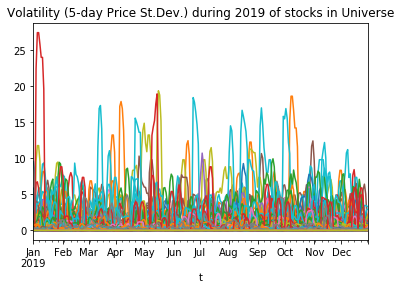

In [18]:
for k, s in volatility.items():
    s['stddev_ndays5'].plot(title="Volatility (5-day Price St.Dev.) during 2019 of stocks in Universe")

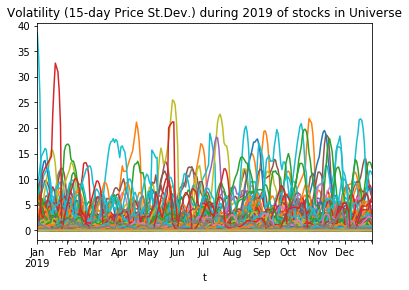

In [19]:
for k, s in volatility.items():
    s['stddev_ndays15'].plot(title="Volatility (15-day Price St.Dev.) during 2019 of stocks in Universe")

In [20]:
crossection = []

for k, s in volatility.items():
    s['mean_vol'] = s['stddev_ndays5'].mean()
    item = {'ticker': k, 'mean_volatility': s['stddev_ndays5'].mean(), 
            'mean_price': s['Price'].mean(),
            'volatility_5d': s['2019-01-01':'2019-12-31']['stddev_ndays5'].values[0]}
    crossection.append(item)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
crossection = pd.DataFrame(crossection)
crossection[['ticker','volatility_5d','mean_price']]

,ticker,volatility_5d,mean_price
0,7UP,0.004000,0.412452
1,A,0.020000,6.301533
2,AAV,0.025298,3.562835
3,ABPIF,0.024000,3.987471
4,ACC,0.004899,0.649080
...,...,...,...
464,WHA,0.112000,4.428276
465,WIIK,0.008000,1.465249
466,WIN,0.011662,0.514598
467,WORK,0.146969,21.895594


Text(0.5, 1.0, '2019 Avg Price vs 5-day Price St.Dev. of 469 stocks')

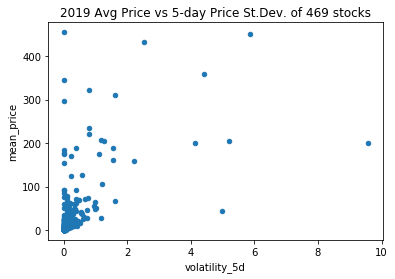

In [22]:
# crossection[['ticker','volatility_5d','mean_price']].to_csv('volatility2019_crossection.csv')

# plot 1: 

ax = crossection[['ticker','volatility_5d','mean_price']].plot.scatter(x='volatility_5d', y='mean_price')
plt.title('2019 Avg Price vs 5-day Price St.Dev. of 469 stocks')


Text(0.5, 1.0, '2019 Avg Price vs 5-day Price St.Dev. of 469 stocks')

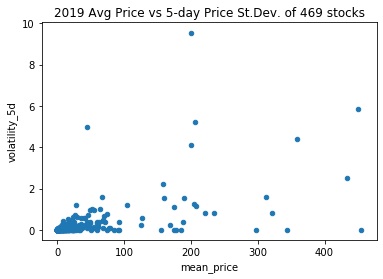

In [23]:
# plot 2: 

ax = crossection[['ticker','volatility_5d','mean_price']].plot.scatter(x='mean_price', y='volatility_5d')
plt.title('2019 Avg Price vs 5-day Price St.Dev. of 469 stocks')


In [24]:
df3 = crossection[['ticker','volatility_5d','mean_price']]
df3['vol2prc'] = df3['volatility_5d'] / df3['mean_price'] 
df3.tail()

,ticker,volatility_5d,mean_price,vol2prc
464,WHA,0.112000,4.428276,0.025292
465,WIIK,0.008000,1.465249,0.005460
466,WIN,0.011662,0.514598,0.022662
467,WORK,0.146969,21.895594,0.006712
468,ZMICO,0.008000,0.915441,0.008739


Text(0, 0.5, 'number of stocks')

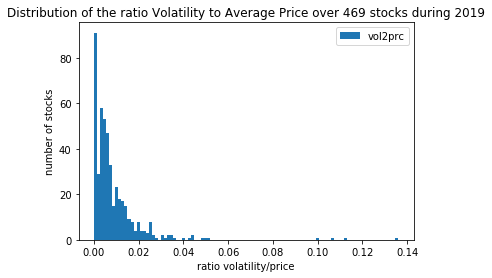

In [25]:
ax = df3[['vol2prc']].plot.hist(bins=100)
plt.title('Distribution of the ratio Volatility to Average Price over 469 stocks during 2019')
plt.xlabel('ratio volatility/price')
plt.ylabel('number of stocks')

# Group by Sector/Industry

In [26]:
import os.path
datapath = os.path.join('..', """1.2 Identify sources and collect data""", 'stock_ticker.csv')
stockinfolookup = pd.read_csv(datapath)
stockinfolookup.tail(3)

,Unnamed: 0,symbol,exchange,industry,sector,name
574,YCI,YCI,SET,Industrials,Petrochemicals & Chemicals,YONG THAI PUBLIC COMPANY LIMITED
575,ZEN,ZEN,SET,Agro & Food Industry,Food & Beverage,ZEN CORPORATION GROUP PUBLIC COMPANY LIMITED
576,ZMICO,ZMICO,SET,Financials,Finance & Securities,SEAMICO SECURITIES PUBLIC COMPANY LIMITED


In [28]:
def get_sector(r):
    try:
        return stockinfolookup.loc[stockinfolookup['symbol']==r].sector.values[0]
    except:
        print("Error getting sector for %s" % r)
    return "ERROR"

def get_industry(r):
    try:
        return stockinfolookup.loc[stockinfolookup['symbol']==r].industry.values[0]
    except:
        print("Error getting industry for %s" % r)
    return "ERROR"

df3['sector'] = df3['ticker'].apply(get_sector)
df3['industry'] = df3['ticker'].apply(get_industry)

Error getting sector for APEX
Error getting sector for BAT3K
Error getting sector for BKKCP
Error getting sector for BLAND
Error getting sector for CTARAF
Error getting sector for DTAC
Error getting sector for DTC
Error getting sector for F&D
Error getting sector for GEN
Error getting sector for GOLD
Error getting sector for GOLDPF
Error getting sector for IT
Error getting sector for KKP
Error getting sector for KPNPF
Error getting sector for LHPF
Error getting sector for MCHAI
Error getting sector for MII
Error getting sector for MSTOR
Error getting sector for MIPF
Error getting sector for MJLF
Error getting sector for MNIT
Error getting sector for NUSA
Error getting sector for PRIN
Error getting sector for QCON
Error getting sector for QH
Error getting sector for QHHR
Error getting sector for QHOP
Error getting sector for RCI
Error getting sector for RS
Error getting sector for S&J
Error getting sector for SAWANG
Error getting sector for SBPF
Error getting sector for SEED
Error getti

In [ ]:
df3[['sector','volatility_5d']]

Text(0, 0.5, 'Volatility')

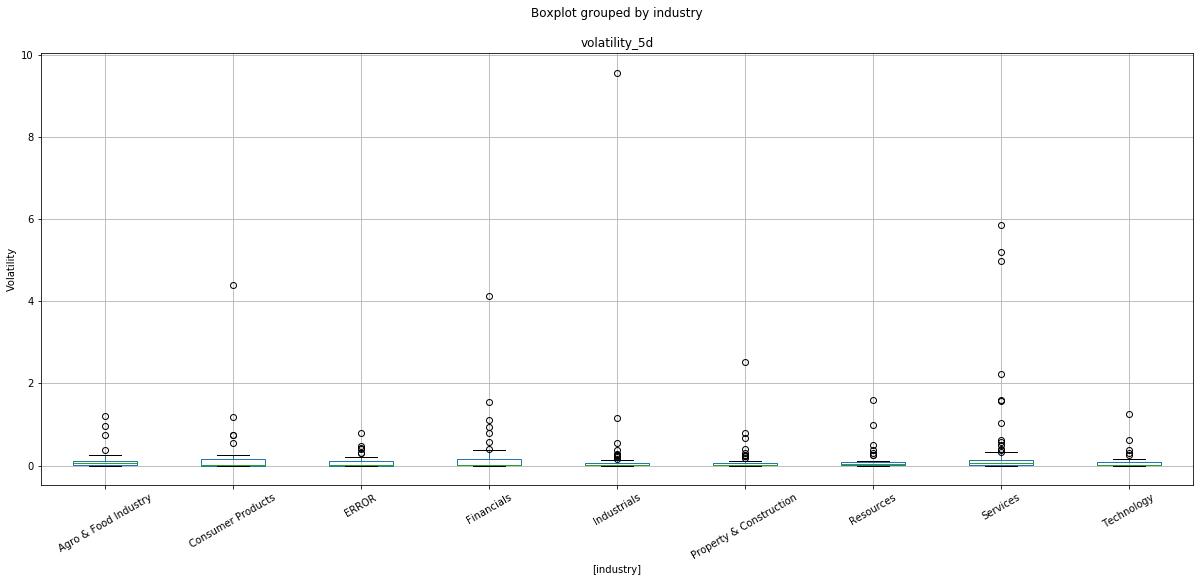

In [29]:
ax = df3[['industry','sector','volatility_5d']].boxplot(by=['industry'], figsize=(20,8),rot=30)
plt.ylabel('Volatility')

Text(0, 0.5, 'Volatility')

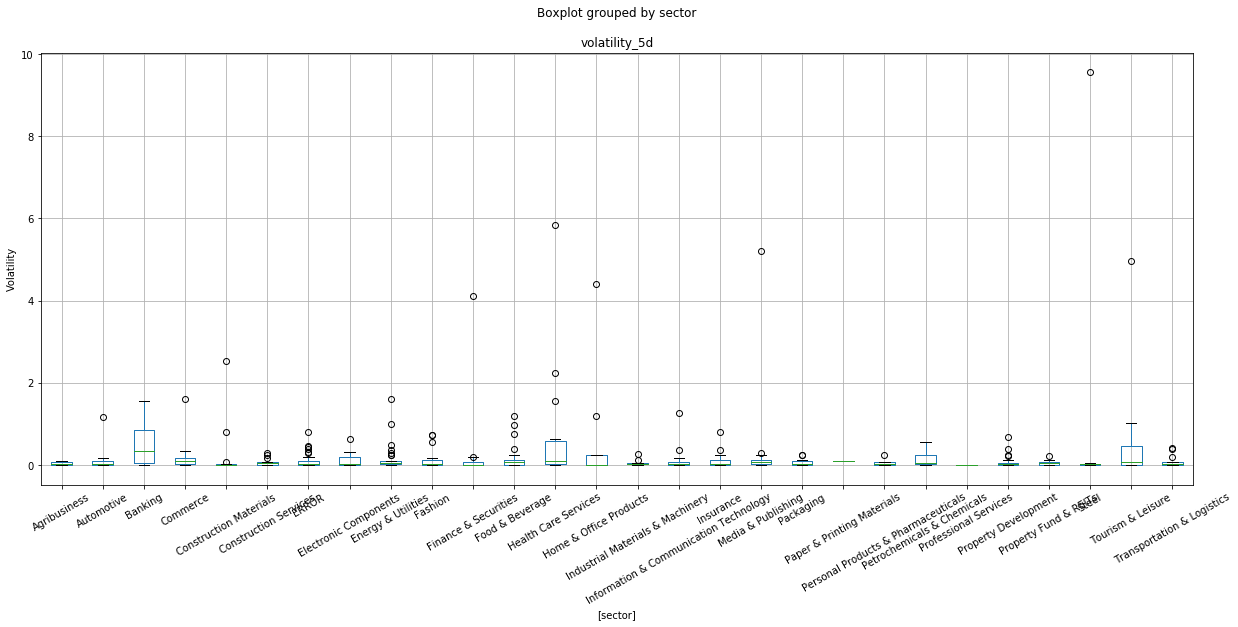

In [30]:
ax = df3[['industry','sector','volatility_5d']].boxplot(by=['sector'], figsize=(20,8),rot=30)
plt.ylabel('Volatility')